In [1]:
import numpy as np
import netCDF4
import pylab as plt
filename='/Users/ben/data/aw103/mslp/aw103a.pm_1960_1999_mslp.nc'
ncfile = netCDF4.Dataset(filename, 'r')

In [2]:
ncfile

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Unified Model Output
    um_version: 10.6.1
    um_suite: u-aw103
    source: aw103a.pm1961jan.pp
    history: Wed May 23 14:31:49 2018: ncrcat aw103a.pm_1960_1969_mslp.nc aw103a.pm_1970_1979_mslp.nc aw103a.pm_1980_1989_mslp.nc aw103a.pm_1990_1999_mslp.nc -o aw103a.pm_1960_1999_mslp.nc
Wed May 23 14:27:38 2018: ncrcat aw103a.pm1961.nc_mslp.nc aw103a.pm1962.nc_mslp.nc aw103a.pm1963.nc_mslp.nc aw103a.pm1964.nc_mslp.nc aw103a.pm1965.nc_mslp.nc aw103a.pm1966.nc_mslp.nc aw103a.pm1967.nc_mslp.nc aw103a.pm1968.nc_mslp.nc aw103a.pm1969.nc_mslp.nc -o aw103a.pm_1960_1969_mslp.nc
Wed May 23 14:21:20 2018: ncks -v p_1 /group_workspaces/jasmin2/acsis/mkoehler/um/monsoon/aw103/nc/monthly/12monthly//aw103a.pm1961.nc /work/scratch-nompiio/ptg21/aw103a.pm1961.nc_mslp.nc
Wed Mar 28 12:16:14 2018: ncrcat aw103a.pm1961jan.nc aw103a.pm1961feb.nc aw103a.pm1961mar.nc aw103a.pm1961apr.nc aw103a.pm1961may.nc

In [4]:
longitude = ncfile.variables['longitude'][:]
latitude = ncfile.variables['latitude'][:]
pressure=ncfile.variables['p_1'][:]

In [5]:
latitude

masked_array(data = [-89.375 -88.125 -86.875 -85.625 -84.375 -83.125 -81.875 -80.625 -79.375
 -78.125 -76.875 -75.625 -74.375 -73.125 -71.875 -70.625 -69.375 -68.125
 -66.875 -65.625 -64.375 -63.125 -61.875 -60.625 -59.375 -58.125 -56.875
 -55.625 -54.375 -53.125 -51.875 -50.625 -49.375 -48.125 -46.875 -45.625
 -44.375 -43.125 -41.875 -40.625 -39.375 -38.125 -36.875 -35.625 -34.375
 -33.125 -31.875 -30.625 -29.375 -28.125 -26.875 -25.625 -24.375 -23.125
 -21.875 -20.625 -19.375 -18.125 -16.875 -15.625 -14.375 -13.125 -11.875
 -10.625 -9.375 -8.125 -6.875 -5.625 -4.375 -3.125 -1.875 -0.625 0.625
 1.875 3.125 4.375 5.625 6.875 8.125 9.375 10.625 11.875 13.125 14.375
 15.625 16.875 18.125 19.375 20.625 21.875 23.125 24.375 25.625 26.875
 28.125 29.375 30.625 31.875 33.125 34.375 35.625 36.875 38.125 39.375
 40.625 41.875 43.125 44.375 45.625 46.875 48.125 49.375 50.625 51.875
 53.125 54.375 55.625 56.875 58.125 59.375 60.625 61.875 63.125 64.375
 65.625 66.875 68.125 69.375 70.625 71.875 

In [4]:
#finding where longitude is closest too 0
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return(idx)
idx_1 = find_nearest(longitude, 0.)
print("longitude closest to 0 at value", longitude[idx_1])

#finding where latitude is closest to 0
idx_2 = find_nearest(latitude, 0.)
print("latitude is closest to 0 at value", latitude[idx_2])

('longitude closest to 0 at value', 0.9375)
('latitude is closest to 0 at value', -0.625)


In [5]:
import numpy as np
import netCDF4
import pylab as plt
filename='/Users/ben/data/aw103/mslp/aw103a.pm_1960_1999_mslp.nc'
ncfile = netCDF4.Dataset(filename, 'r')
longitude = ncfile.variables['longitude'][:]
latitude = ncfile.variables['latitude'][:]
pressure=ncfile.variables['p_1'][:]
p_0_0 = pressure[:,0,idx_2,idx_1]

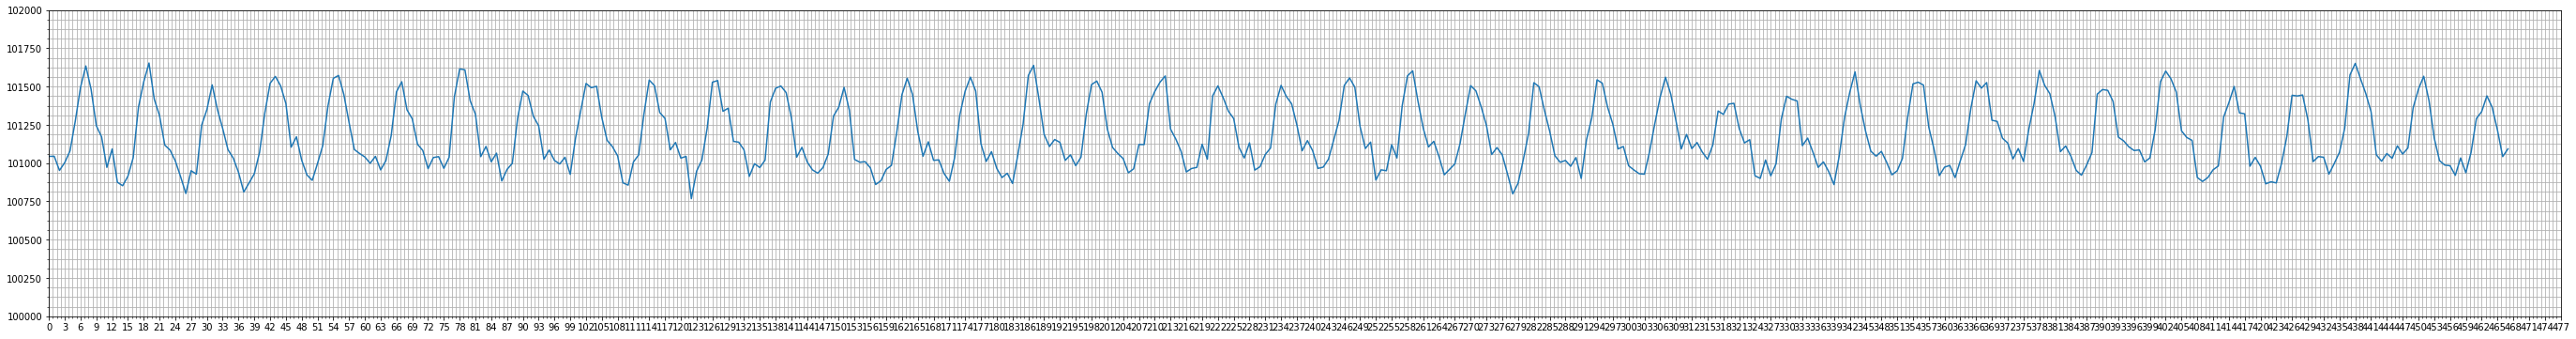

(468,)

In [77]:
plt.figure(figsize=(48, 6))
plt.ylim(100000, 102000)
plt.xlim(0, 468)
plt.minorticks_on()
xticks = np.arange(0, 480, 3)
plt.plot(p_0_0)
plt.xticks(xticks)
plt.grid(True, which = 'both')
plt.show()
np.shape(p_0_0)

[7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 6, 6, 7, 7, 6, 6, 6, 7, 8, 6, 7, 7, 6, 6, 6, 6, 7, 8, 6, 7, 7]


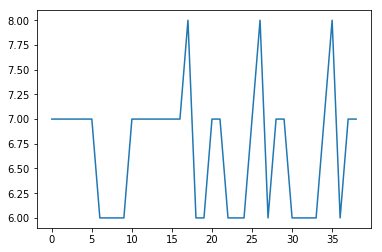

In [104]:
max_p = []
for iyear in range (0, 39):
    yeardata = p_0_0[iyear*12 : (iyear+1)*12]
    monthmax = np.argmax(yeardata)
    max_p.append(monthmax)
print(max_p)
plt.plot(max_p)
    #monthmax = np.argmax(yeardata)
    #print(monthmax)